In [21]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [22]:
data = pd.read_csv('telecom_churn_clean.csv')
data

,Unnamed: 0,account_length,area_code,international_plan,voice_mail_plan,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,total_eve_minutes,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,customer_service_calls,churn
0,0,128,415,0,1,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,0
1,1,107,415,0,1,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,0
2,2,137,415,0,0,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,0
3,3,84,408,1,0,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,0
4,4,75,415,1,0,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3328,3328,192,415,0,1,36,156.2,77,26.55,215.5,126,18.32,279.1,83,12.56,9.9,6,2.67,2,0
3329,3329,68,415,0,0,0,231.1,57,39.29,153.4,55,13.04,191.3,123,8.61,9.6,4,2.59,3,0
3330,3330,28,510,0,0,0,180.8,109,30.74,288.8,58,24.55,191.9,91,8.64,14.1,6,3.81,2,0
3331,3331,184,510,1,0,0,213.8,105,36.35,159.6,84,13.57,139.2,137,6.26,5.0,10,1.35,2,0


In [23]:
X = data.drop('churn', axis=1).values
y= data.churn.values

In [24]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split

In [25]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=22)

In [26]:
neighbors = np.arange(1,13)
train_accuracies={}
test_accuracies = {

}

for neighbor in neighbors:

    knn = KNeighborsClassifier(n_neighbors=neighbor)
    knn.fit(X_train, y_train)
    test_accuracies[neighbor]=knn.score(X_test, y_test)
    train_accuracies[neighbor]=knn.score(X_train, y_train)

print(neighbors, '\n', train_accuracies, '\n', test_accuracies)



[ 1  2  3  4  5  6  7  8  9 10 11 12] 
 {1: 1.0, 2: 0.8885971492873218, 3: 0.8942235558889723, 4: 0.8754688672168042, 5: 0.8810952738184546, 6: 0.8683420855213804, 7: 0.8747186796699175, 8: 0.8634658664666166, 9: 0.8645911477869468, 10: 0.8608402100525131, 11: 0.8630907726931732, 12: 0.8604651162790697} 
 {1: 0.7901049475262368, 2: 0.8470764617691154, 3: 0.8365817091454273, 4: 0.8515742128935532, 5: 0.848575712143928, 6: 0.8530734632683659, 7: 0.8575712143928036, 8: 0.8545727136431784, 9: 0.856071964017991, 10: 0.8545727136431784, 11: 0.856071964017991, 12: 0.8530734632683659}


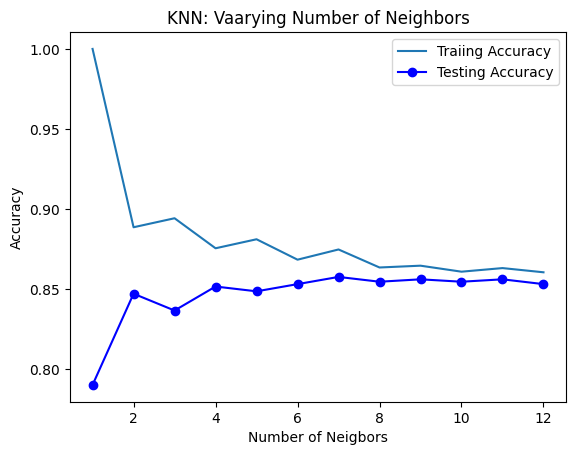

In [27]:
plt.title('KNN: Vaarying Number of Neighbors')

plt.plot(neighbors, train_accuracies.values(), label='Traiing Accuracy')
plt.plot(neighbors, test_accuracies.values(), label='Testing Accuracy', color='blue', marker='o')

plt.xlabel('Number of Neigbors')
plt.ylabel('Accuracy')
plt.legend()


plt.show()